Create a report that covers the following:

1) What factors affect whether customers cancel their booking?
2) Are cancellations more likely during weekends?
3) Which general recommendations for the hotel can you make?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

In [2]:
hotel = pd.read_csv(r"C:\Users\yeshw\Downloads\hotel_bookings.csv").dropna()
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27511 entries, 1 to 36273
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            27511 non-null  object 
 1   no_of_adults                          27511 non-null  float64
 2   no_of_children                        27511 non-null  float64
 3   no_of_weekend_nights                  27511 non-null  float64
 4   no_of_week_nights                     27511 non-null  float64
 5   type_of_meal_plan                     27511 non-null  object 
 6   required_car_parking_space            27511 non-null  float64
 7   room_type_reserved                    27511 non-null  object 
 8   lead_time                             27511 non-null  float64
 9   arrival_year                          27511 non-null  float64
 10  arrival_month                         27511 non-null  float64
 11  arrival_date   

In [19]:
display(hotel['repeated_guest'])

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
36268    0.0
36269    0.0
36271    0.0
36272    0.0
36273    0.0
Name: repeated_guest, Length: 27511, dtype: float64

### 1) Factors that can affect customers cancellations are:
1) Type of meal plan 
2) Car Parking Space
3) Room type reserved 
4) Arrival Month 
5) Arrival Date 
6) Market Segment
7) Whether or not they are repeat guests 
8) No of previous cancellations 
9) N.o of Previous bookings not cancelled
10) Average price of rooms

In [3]:
# Selecting reservation that have cancelled their bookings
cancel = (hotel[hotel['booking_status'] == 'Canceled'])


### Type of Meal Plan

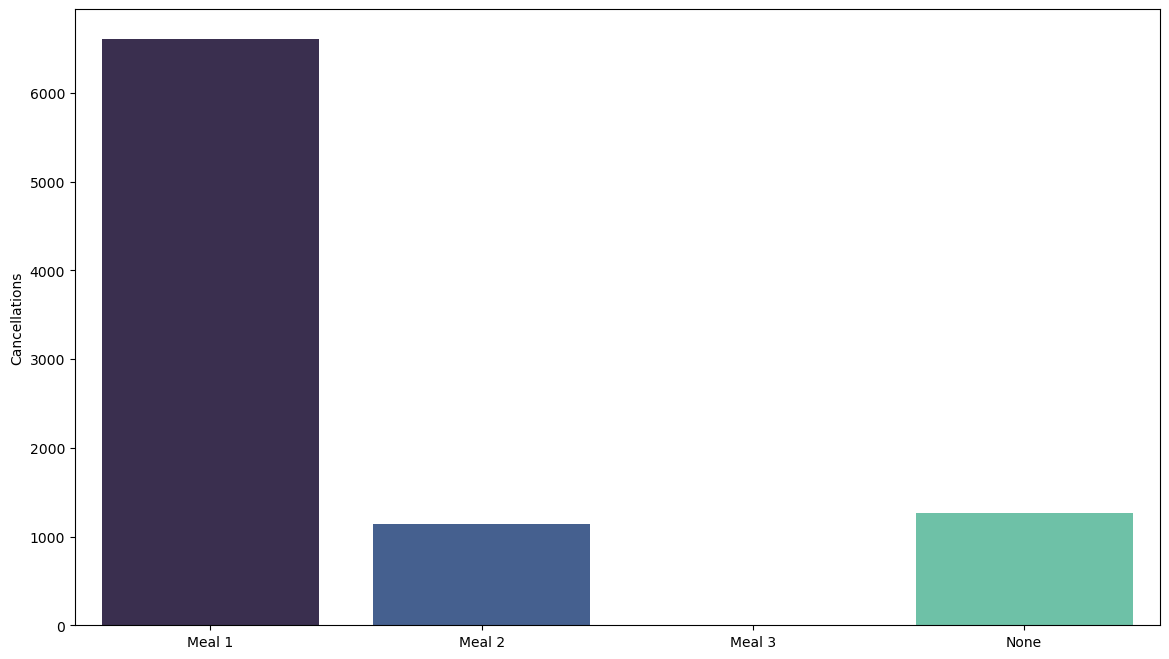

In [4]:
meal = (cancel.groupby('type_of_meal_plan')['booking_status'].count())
plt.figure(figsize = (14,8))
sns.barplot(x = ['Meal 1', 'Meal 2', 'Meal 3', 'None'], y = meal, palette = 'mako')
plt.ylabel('Cancellations')
plt.show()

Implying that customers cancelled their reservation based on the meal type that they chose is something that does not
have a strong backing

### Car Parking Place

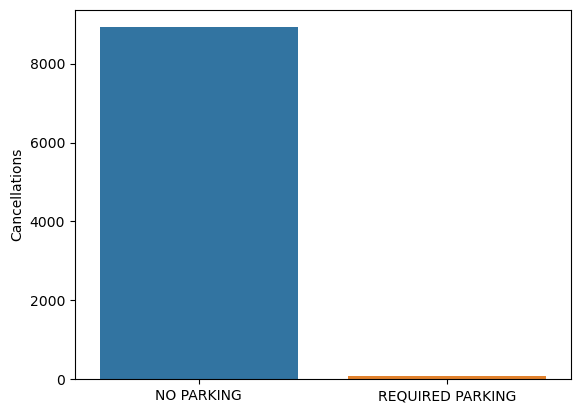

In [5]:
no_parking = cancel[cancel["required_car_parking_space"] == 0].count()
yes_parking = cancel[cancel["required_car_parking_space"] == 1].count()
sns.barplot( x = ['NO PARKING', 'REQUIRED PARKING'], y = [no_parking['required_car_parking_space'], yes_parking['required_car_parking_space']])
plt.ylabel('Cancellations')
plt.show()

Availabilty of parking did not influence customers choice to cancel their reservation.

### Room type reserved

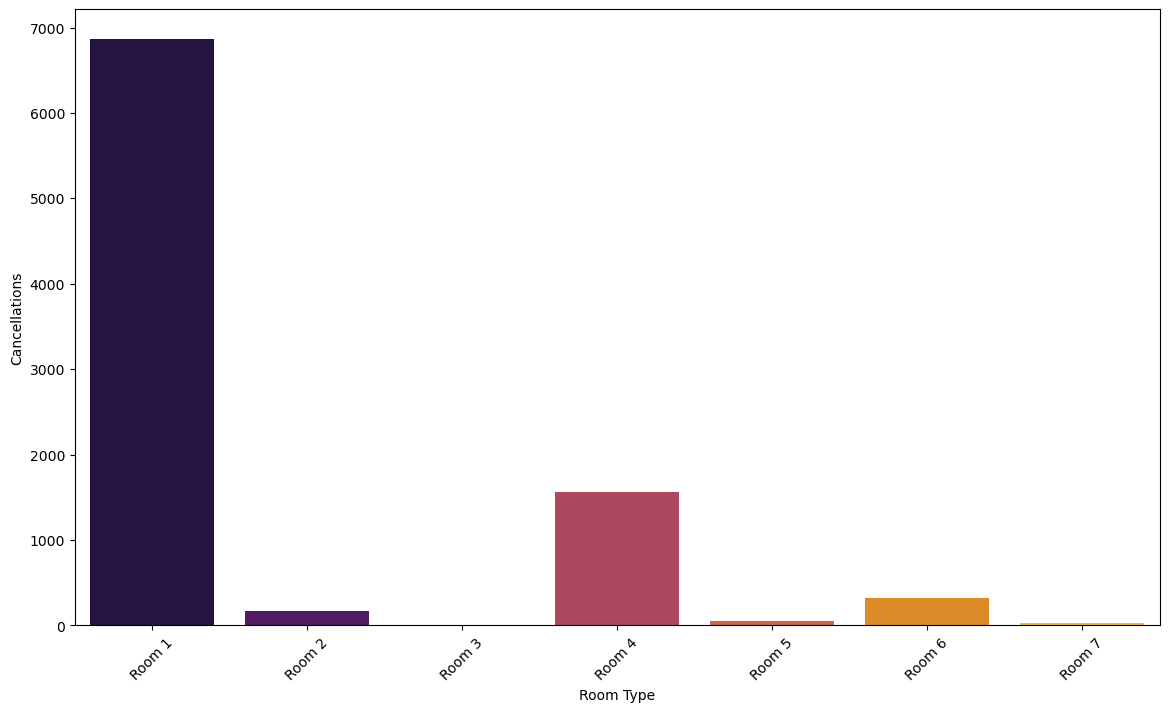

In [6]:
room_group = cancel.groupby("room_type_reserved")['booking_status'].count()
plt.figure(figsize = (14,8))
sns.barplot( x = ['Room 1','Room 2','Room 3','Room 4', 'Room 5',
 'Room 6','Room 7'], y = room_group, palette = 'inferno')
plt.xticks(rotation = 45)
plt.ylabel('Cancellations')
plt.xlabel('Room Type')
plt.show()

Cancellation of reservation with hotel is more prominently associated with Room 1 i.e. customers who were alloted room 1 more often than not cancelled their reservation with the hotel.

### Arrival Month

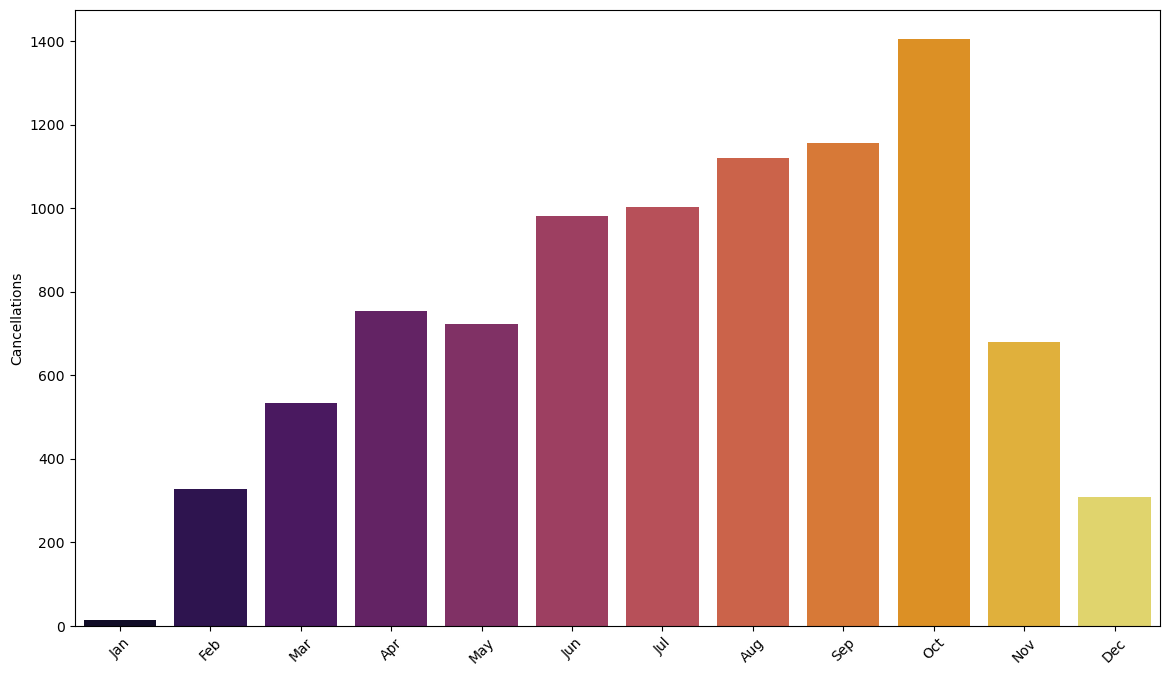

In [7]:
arrival_group = cancel.groupby('arrival_month')['booking_status'].count()
plt.figure(figsize = (14,8))
sns.barplot( x = ['Jan','Feb','Mar','Apr', 'May','Jun','Jul',
 'Aug','Sep','Oct','Nov','Dec'], y = arrival_group, palette = 'inferno')
plt.xticks(rotation = 45)
plt.ylabel('Cancellations')
plt.show()

From June to July we can see an increasing trend in the cancellation of reservation, peaking at the month of october.

### Arrival Date

In [17]:
arrival_group = cancel.groupby("arrival_date")['booking_status'].count()
display(arrival_group.sort_values(ascending = False).head(10).reset_index())

,arrival_date,booking_status
0,15.0,415
1,4.0,365
2,1.0,359
3,16.0,353
4,6.0,343
5,17.0,340
6,12.0,333
7,30.0,330
8,26.0,318
9,3.0,314


We can see that majority of the cancellations either take place in the first or third week of the month

### Market Segment Type

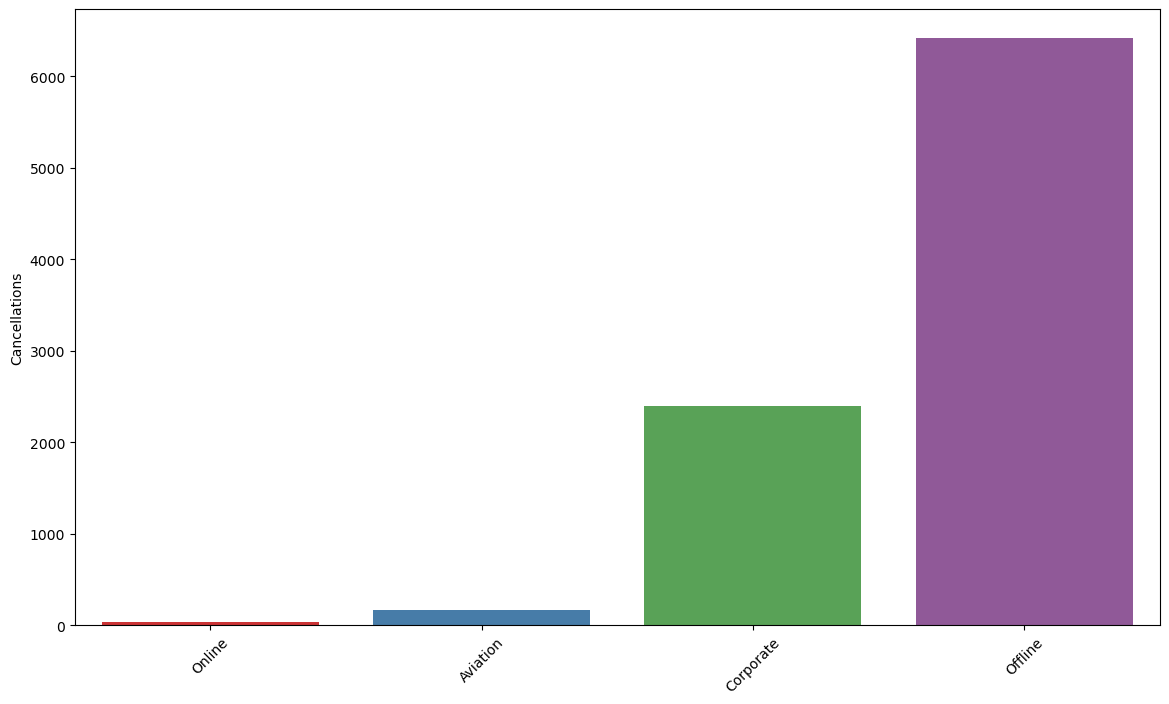

In [9]:
market_segment_group = cancel.groupby("market_segment_type")['booking_status'].count()
plt.figure(figsize = (14,8))
sns.barplot( x = ['Online','Aviation','Corporate','Offline'], y = market_segment_group, palette = 'Set1')
plt.xticks(rotation = 45)
plt.ylabel('Cancellations')
plt.show()

We can see that majority of the customers who cancel their booking with the hotel are individuals who do their booking through offline modes. Closely following the offline segment is the corporate segment.

### Repeated Guests

  repeated_guest  Booking Count
0      New Guest           9000
1   Repeat Guest             10


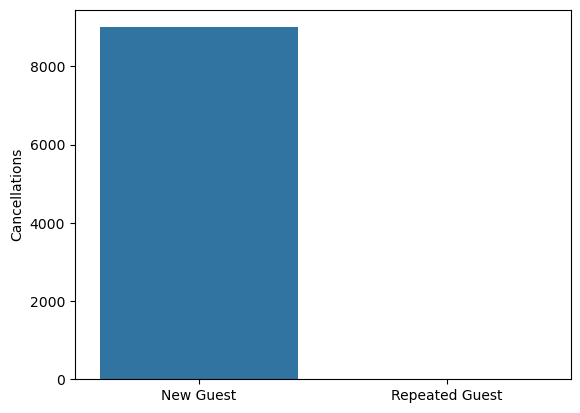

In [10]:
type_of_customer_group = cancel.groupby("repeated_guest")['booking_status'].count()
table_format = type_of_customer_group.reset_index(name='Booking Count')
table_format.at[0,'repeated_guest'] = 'New Guest'
table_format.at[1,'repeated_guest'] = 'Repeat Guest'
print(table_format)
sns.barplot( x = ['New Guest', 'Repeated Guest'], y = type_of_customer_group, palette = 'tab20')
plt.ylabel('Cancellations')
plt.show()

From the analysis we can see that it is typically the new guests who go through with the cancellations of their booking.

### No of previous cancellations -- Number of previous bookings that were canceled by the customer prior to the current booking

                       Type  Previous Cancellations
0  No Previous cancellation                    9000
1                 Cancelled                       6
2  Cancelled more than once                       4


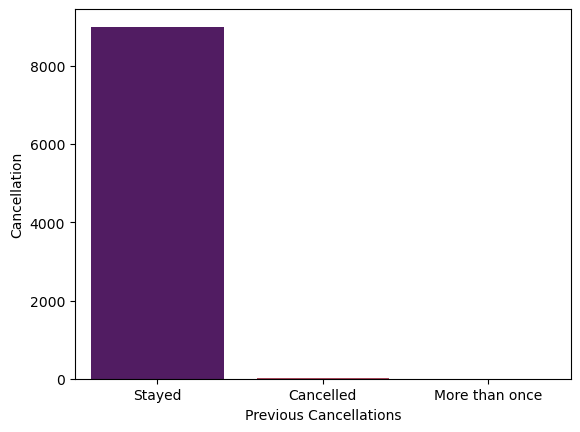

In [11]:
previous_cancellation = cancel.groupby('no_of_previous_cancellations')['booking_status'].count()
table = previous_cancellation.reset_index(name = 'Previous Cancellations')
table.columns = ['Type', 'Previous Cancellations' ]
table.at[0,'Type'] = 'No Previous cancellation'
table.at[1,'Type'] = 'Cancelled'
table.at[2,'Type'] = 'Cancelled more than once'
print(table)
sns.barplot(x = ['Stayed', 'Cancelled', 'More than once'], y = previous_cancellation, palette = "inferno" )
plt.ylabel('Cancellation')
plt.xlabel('Previous Cancellations')
plt.show()

The proportions of customers that did not cancel prior to the current booking far out weighs the individuals who cancelled prior to their current booking.

### N.o of Previous bookings not cancelled - Number of previous bookings not canceled by the customer prior to the current booking

In [18]:
previous_booking = cancel.groupby("no_of_previous_bookings_not_canceled")['booking_status'].count()
book = previous_booking.reset_index(name = 'Cancelled')
book.columns = ['Type', 'Cancelled']
book.at[0,'Type'] = 'No cancellation'
book.at[1,'Type'] = 'Cancelled'
book.at[2,'Type'] = 'Cancelled more than once'
display(book)

,Type,Cancelled
0,No cancellation,9005
1,Cancelled,4
2,Cancelled more than once,1


### Average Price per room

In [13]:
dummy = []
for i in hotel['booking_status']:
    if i == 'Canceled':
        dummy.append(1)
    else:
        dummy.append(0)
hotel['dummy_can'] = dummy

In [14]:
dummy_n = []

for i in hotel['booking_status']:
    if i == 'Not_Canceled':
        dummy_n.append(1)
    else:
        dummy_n.append(0)

hotel['dummy_not'] = dummy_n

In [15]:
# probit model
x = sm.add_constant(hotel['avg_price_per_room'])
y = hotel['dummy_can']
model = sm.Probit(y,x).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.621967
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:              dummy_can   No. Observations:                27511
Model:                         Probit   Df Residuals:                    27509
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                 0.01649
Time:                        11:20:22   Log-Likelihood:                -17111.
converged:                       True   LL-Null:                       -17398.
Covariance Type:            nonrobust   LLR p-value:                7.748e-127
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0176      0.025    -39.955      0.000      -1.068      -0.968
avg_p

The low Psuedo R-squ value along with the high LLR p-value shows us that the model is insignificant. Implying that customers cancellation does not depend on the average price of the room.

### Are cancellations more likely during weekends?

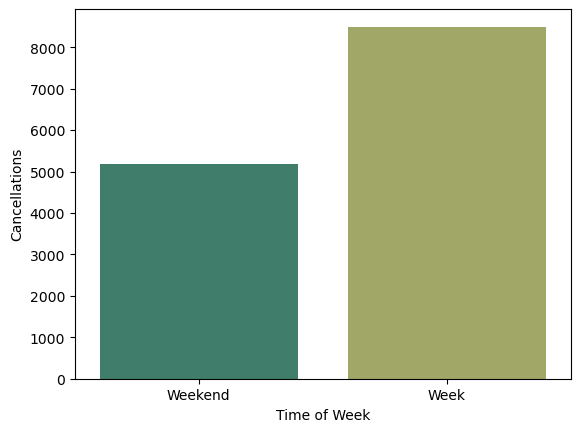

In [16]:
weekend = cancel.groupby('no_of_weekend_nights')["booking_status"].count()
weekend = weekend.iloc[1:].sum()
week = cancel.groupby('no_of_week_nights')["booking_status"].count()
week = week.iloc[1:].sum()
sns.barplot( x = ['Weekend','Week'], y = [weekend, week], palette = 'gist_earth')
plt.ylabel('Cancellations')
plt.xlabel('Time of Week')
plt.show()

Cancellation of Reservations are more likely during the weekdays as opposed to the weekends.

### Recomendations